### 기본 라이브러리 import 및 폰트 설정

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.font_manager as fm
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

### 데이터 불러오기

In [54]:
order = pd.read_csv('data/log_order.csv')
member = pd.read_csv('data/master_member.csv')
product = pd.read_csv('data/master_product.csv')

### 결측치 및 column 확인

In [55]:
order.isnull().sum()

결제수단              0
공급원가             88
교환구분              0
네이버 포인트           0
배송번호              0
배송비 정보            0
배송시작일             0
배송완료일             0
사용한 적립금액          0
상품구매금액            0
상품명              88
상품번호             88
상품별 추가할인금액        0
수량                0
수령인 주소            8
주문 시 회원등급      3105
주문경로              0
주문번호              0
주문일시              0
주문자ID          3105
카드사           30138
쿠폰 할인금액           0
판매가               0
품목번호              0
dtype: int64

### 배송기간 확인을 위한 order 데이터 전처리

In [56]:
# 날짜 포멧 변환 (yyyy-mm-dd)
order['배송시작일_dt'] = order['배송시작일'].apply(lambda x : str(x).split(' ')[0])
order['배송완료일_dt'] = order['배송완료일'].apply(lambda x : str(x).split(' ')[0])
order['주문일시_dt'] = order['주문일시'].apply(lambda x : str(x).split(' ')[0])

In [57]:
# object > datetime 형 변환
order['배송시작일_dt'] = pd.to_datetime(order['배송시작일_dt'])
order['배송완료일_dt'] = pd.to_datetime(order['배송완료일_dt'])
order['주문일시_dt'] = pd.to_datetime(order['주문일시_dt'])

# 타입 확인
order.dtypes

결제수단                  object
공급원가                 float64
교환구분                  object
네이버 포인트                int64
배송번호                  object
배송비 정보                object
배송시작일                 object
배송완료일                 object
사용한 적립금액               int64
상품구매금액                 int64
상품명                   object
상품번호                 float64
상품별 추가할인금액             int64
수량                     int64
수령인 주소                object
주문 시 회원등급             object
주문경로                  object
주문번호                  object
주문일시                  object
주문자ID                 object
카드사                   object
쿠폰 할인금액                int64
판매가                    int64
품목번호                   int64
배송시작일_dt      datetime64[ns]
배송완료일_dt      datetime64[ns]
주문일시_dt       datetime64[ns]
dtype: object

In [58]:
# datetime > int 형변환
order['배송기간'] = order['배송완료일_dt'] - order['배송시작일_dt']
order['배송기간'] = order['배송기간'].dt.days

In [59]:
# datetime > int 형변환
order['배송기간전체'] = order['배송완료일_dt'] - order['주문일시_dt']
order['배송기간전체'] = order['배송기간전체'].dt.days

# 배송기간 별 count
order['배송기간전체'].value_counts().sort_index()

0         14
1         59
2        110
3        158
4      13082
5      16512
6       7329
7       4059
8       2130
9       1193
10       820
11       509
12       270
13       160
14        64
15        56
16        31
17        22
18        22
19        23
20        16
21        22
22        10
23         6
24         4
25         3
26         9
27         2
28        17
29         5
30         2
31         2
32         8
33         1
34         2
35         2
38         1
39         2
47         2
51         1
53         1
68         1
77         3
90         1
113        1
147        1
159        1
Name: 배송기간전체, dtype: int64

In [60]:
# 배송기간 5일 이상인 거래 수 확인
order[order['배송기간전체'] > 5]['주문일시_dt'].dt.year.value_counts()

2018    9382
2019    6371
2017    1061
Name: 주문일시_dt, dtype: int64

### 상품 목록 확인

In [61]:
# 사은품 데이터 제거
order.drop(index=order[order['상품명'].str.contains('사은품') == True].index, axis=0, inplace=True)

In [62]:
# 상품명에 '용기'가 포함된 것
order[order['상품명'].str.contains('용기') == True]['상품명']

0                     195파이 탕용기 소 300개 1set(2박스)
3                  195파이 미니탕용기 투톤 300개 1set(2박스)
5                         210파이 중화면용기 중 300개 1박스
7                         210파이 중화면용기 소 300개 1박스
8                         210파이 중화면용기 중 300개 1박스
                          ...                   
46736              사각 죽용기 소 550ml 500개 1set(2박스)
46742    125파이 원형용기 대 450ml 백색 PP 600개 1set(2박스)
46744                     PP 4칸 도시락용기 A 200개 1박스
46745                    PP 6칸 도시락용기 02 200개 1박스
46748    125파이 원형용기 중 350ml 백색 PP 600개 1set(2박스)
Name: 상품명, Length: 24094, dtype: object

In [63]:
# 상품명에 '컵'이 포함된 것
order[order['상품명'].str.contains('컵') == True]['상품명']

1         95파이 다용도컵 세트 4호 소 200ml 백색 PS 1,000개 1set(2박스)
6        105파이 다용도컵 세트 5호 대 370ml 블랙 PS-1,000개 1set(2박스)
12       105파이 다용도컵 세트 5호 대 370ml 블랙 PS-1,000개 1set(2박스)
37       105파이 다용도컵 세트 5호 중 300ml 블랙 PS-1,000개 1set(2박스)
47         70파이 다용도컵 세트 1호 소 70ml 백색 PS 3,000개 1set(2박스)
                              ...                       
46711              70파이 다용도컵 세트 1호(소/40ml)_투명/PS-100개 소량
46712             70파이 다용도컵 세트 1호(특소/50ml)_백색/PS-100개 소량
46720     95파이 다용도컵 세트 4호 소 200ml 백색 PS 1,000개 1set(2박스)
46722     95파이 다용도컵 세트 4호 소 200ml 백색 PS 1,000개 1set(2박스)
46733     95파이 다용도컵 세트 4호 대 270ml 백색 PS 1,000개 1set(2박스)
Name: 상품명, Length: 6653, dtype: object

In [64]:
# 상품명에 '실링'이 포함된 것
order[order['상품명'].str.contains('실링') == True]['상품명'].value_counts()

150 실링필름 Hold 150mm x 200 meter 투명 무지 4롤 1박스         323
실링용기 2호 백색 1,150ml 800개 1박스                          228
실링용기 3호 백색 650ml 1,200개 1박스                          226
실링용기 3-5호 백색 500ml 1,200개 1박스                        120
실링용기 2-5호 (21호) 백색 900ml 800개 1박스                    108
                                                    ... 
실링용기 32호 반투명 2,000ml 600개 1박스                          1
6/8 실링용기 6호 50개 + 배송비                                  1
실링용기 71호 주황 2,200ml 400개 1박스                           1
실링용기 23194-5A 백색 100개 1박스                              1
PP 실링2호세트 반투명 (190mm x 137mm x H70mm), 800개(총2박스)      1
Name: 상품명, Length: 143, dtype: int64

In [65]:
# 상품명에 '컵'과 '용기'가 포함된 것
order[(order['상품명'].str.contains('컵') == False) & (order['상품명'].str.contains('용기') == False)]['상품명'].value_counts()

250파이 원형 접시 미니 블랙 400개 1박스                           598
175mm 수저 백색 1,500개  맛있숟갈                             392
300파이 원형 접시 대 블랙 200개 1박스                            338
150 실링필름 Hold 150mm x 200 meter 투명 무지 4롤 1박스         323
198mm (7치) 대나무젓가락 1,500개 끝내젓갈                        297
                                                    ... 
누드 케찹병 대 10개(1BOX)                                     1
위생초장병 대 10개(1BOX)                                      1
225파이 뚜껑 200개 1BOX                                     1
웰빙 안새내 대 10개(1BOX)                                     1
PP 실링2호세트 반투명 (190mm x 137mm x H70mm), 800개(총2박스)      1
Name: 상품명, Length: 273, dtype: int64

### 주문경로 확인

In [66]:
# 주문경로 많은 순으로 정렬
order['주문경로'].value_counts()

PC쇼핑몰     20754
모바일웹      15284
네이버 페이     2523
Name: 주문경로, dtype: int64

### 주문방법(카드) 확인

In [67]:
# 카드사를 주문 많은 순으로 정렬
order[order['배송기간전체'] > 5]['카드사'].value_counts() # .str.split(' ').str[0].value_counts()

기타               1491
삼성                995
신한(구.LG카드 포함)     772
현대                622
비씨                539
국민                450
NH (농협)           345
롯데                249
하나SK              102
외환                 60
씨티                 32
카카오뱅크              23
광주                 11
신한                  5
제주                  4
신협                  4
수협                  3
국내아멕스               3
전북                  2
Name: 카드사, dtype: int64

### 배송기간 column 생성

In [68]:
# 배송기간 5일 미만과 5일 이상으로 설정
delivery_period = order['배송기간'].apply(lambda x : x if x < 5 else 5)
delivery_period

0        4
1        4
2        4
3        4
4        4
        ..
46744    4
46745    4
46746    5
46747    3
46748    4
Name: 배송기간, Length: 38561, dtype: int64

In [69]:
# 배송기간별 주문 수 확인
delivery_period_count = delivery_period.value_counts().sort_index()
delivery_period_count

0      119
1      153
2      179
3      148
4    35341
5     2621
Name: 배송기간, dtype: int64

In [70]:
# 배송기간이 4일인 데이터 제거(따로 비교)
delivery_period_count_drop4 = delivery_period_count.drop(4)
delivery_period_count_drop4

0     119
1     153
2     179
3     148
5    2621
Name: 배송기간, dtype: int64

### 배송기간 시각화

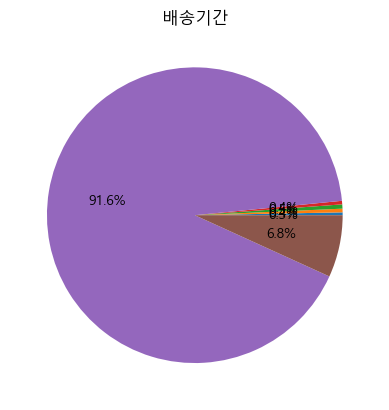

In [71]:
# pie plot 설정
plt.pie(delivery_period_count, autopct='%1.1f%%')
plt.title('배송기간')
plt.show()

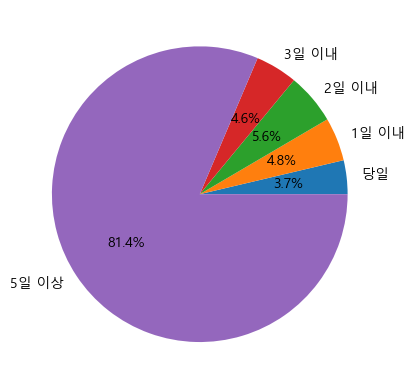

In [72]:
# pie plot 설정(4일 제외)
plt.pie(delivery_period_count_drop4, labels = ['당일', '1일 이내', '2일 이내', '3일 이내', '5일 이상'], autopct='%1.1f%%')
plt.show()

### 배송기간 설정

In [73]:
# 열 생성
order['배송일_year'] = order['배송완료일_dt'].dt.year

In [74]:
# 열 생성 (5일 초과)
order['배송기간_5일이상'] = order['배송기간'] > 5

In [75]:
# 열 생성 (4일 미만)
order['배송기간_4일미만'] = order['배송기간'] < 4

In [76]:
# 연도별 배송기간 5일 초과 갯수
order.groupby('배송일_year')['배송기간_5일이상'].sum()

배송일_year
2017    866
2018    958
2019    575
Name: 배송기간_5일이상, dtype: int64

In [77]:
# 연도별 배송기간 4일 미만 갯수
order.groupby('배송일_year')['배송기간_4일미만'].sum()

배송일_year
2017    177
2018    241
2019    181
Name: 배송기간_4일미만, dtype: int64

In [78]:
# 배송 시작일 시간순으로 정렬
order_time_accending = order.copy()
order_time_accending = order_time_accending.sort_values(['배송시작일_dt'])

In [79]:
# 연도별 배송 시작일 변수 생성
order_time_accending_2017 = order_time_accending[order_time_accending['배송시작일_dt'].dt.year == 2017]
order_time_accending_2018 = order_time_accending[order_time_accending['배송시작일_dt'].dt.year == 2018]
order_time_accending_2019 = order_time_accending[order_time_accending['배송시작일_dt'].dt.year == 2019]

In [80]:
# 연도별 배송 시작일 형 변환(datetime > int) 후 새로운 column으로 생성
order_time_accending_2017['배송시작일_dt_month'] = order_time_accending_2017['배송시작일_dt'].dt.month
order_time_accending_2018['배송시작일_dt_month'] = order_time_accending_2018['배송시작일_dt'].dt.month
order_time_accending_2019['배송시작일_dt_month'] = order_time_accending_2019['배송시작일_dt'].dt.month

C:\Users\jhc74\AppData\Local\Temp\ipykernel_24292\1874082738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_time_accending_2017['배송시작일_dt_month'] = order_time_accending_2017['배송시작일_dt'].dt.month
C:\Users\jhc74\AppData\Local\Temp\ipykernel_24292\1874082738.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_time_accending_2018['배송시작일_dt_month'] = order_time_accending_2018['배송시작일_dt'].dt.month
C:\Users\jhc74\AppData\Local\Temp\ipykernel_24292\1874082738.py:4: SettingWithCopyWarning: 
A value 

In [81]:
# 2019년 6월 데이터 부족으로 삭제
order_time_accending_2019 = order_time_accending_2019.drop(order_time_accending_2019[order_time_accending_2019['배송시작일_dt_month'] == 6].index)
order_time_accending_2019['배송시작일_dt_month']

159      1
154      1
157      1
156      1
155      1
        ..
17485    5
17486    5
17487    5
17488    5
17481    5
Name: 배송시작일_dt_month, Length: 17557, dtype: int64

In [82]:
# 2017년도 월별 판매금액 합계
order_time_accending_2017.groupby('배송시작일_dt_month')['판매가'].sum()

배송시작일_dt_month
1       174200
2      1222085
3      2606975
4      2799410
5      7359330
6      7664720
7      8360990
8      7274440
9      9324320
10     8479100
11    15394700
12    17961130
Name: 판매가, dtype: int64

In [83]:
# 2017년도 12월 판매금액 평균
order_time_accending_2017[order_time_accending_2017['배송시작일_dt_month'] == 12]['판매가'].mean()

61300.784982935154

### 데이터 시각화

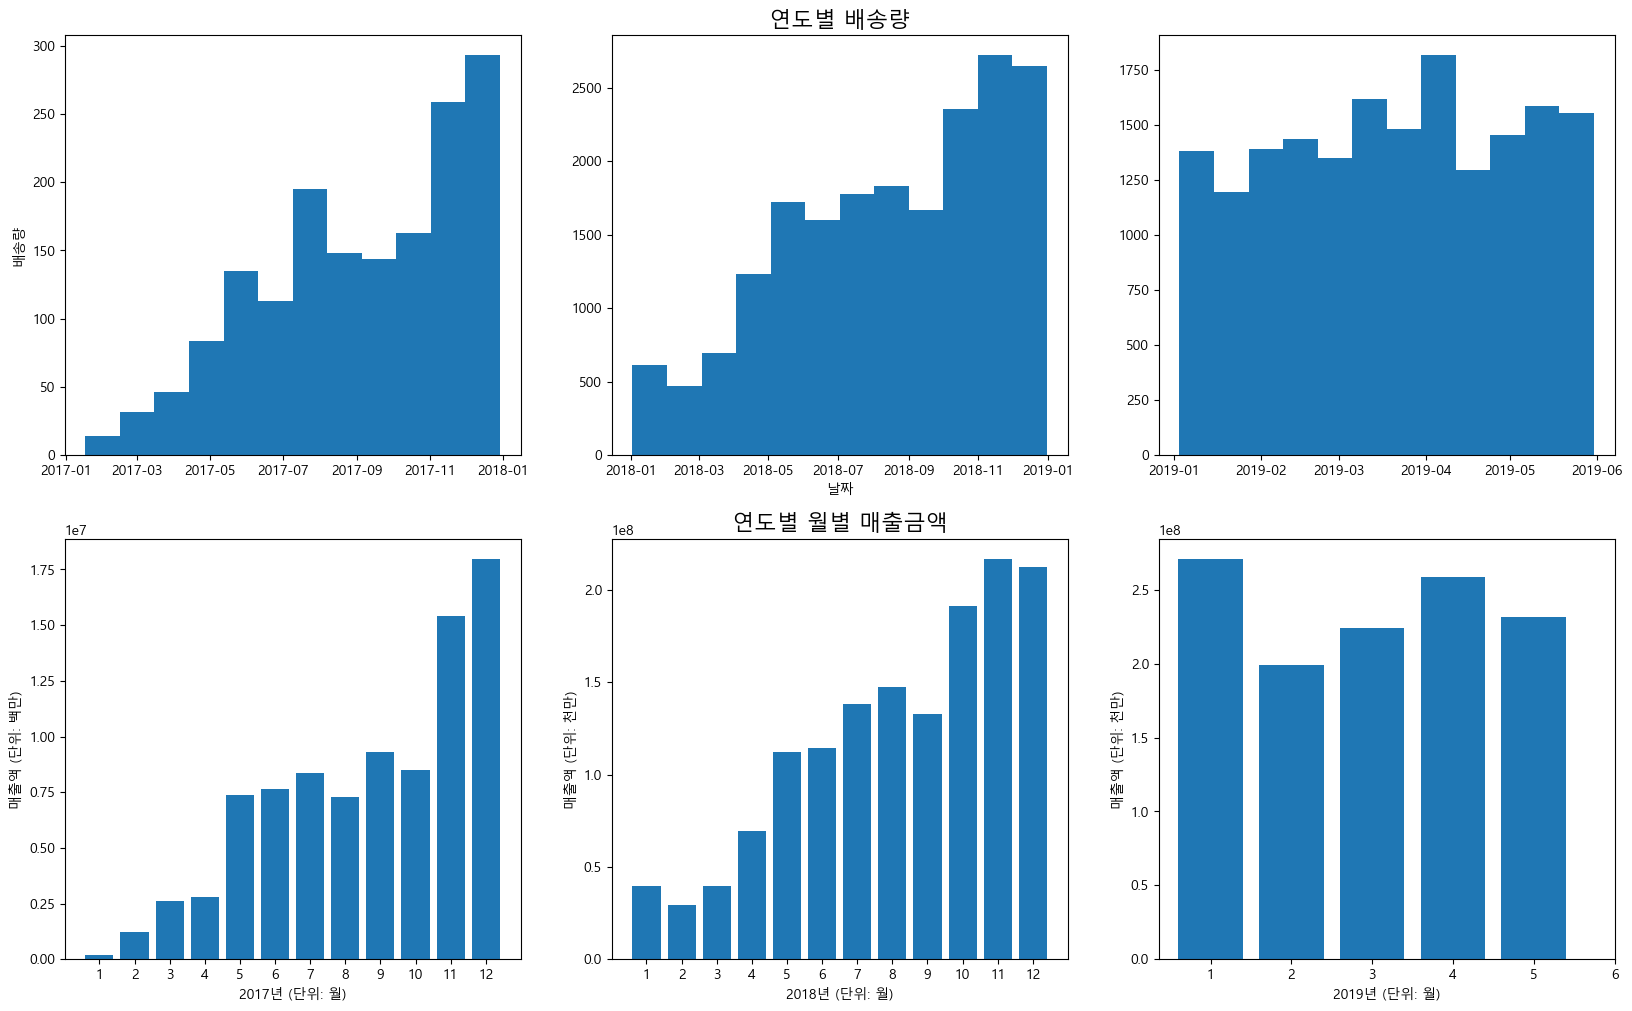

In [84]:
# 연도별 배송량 막대그래프
fig = plt.figure(figsize=(20,12))

ax1 = fig.add_subplot(2,3,1)
ax1.hist(order_time_accending_2017['배송시작일_dt'], bins=12)
ax1.set_ylabel('배송량')

ax2 = fig.add_subplot(2,3,2)
ax2.hist(order_time_accending_2018['배송시작일_dt'], bins=12)
ax2.set_xlabel('날짜')

plt.title('연도별 배송량', size=16)

ax3 = fig.add_subplot(2,3,3)
ax3.hist(order_time_accending_2019['배송시작일_dt'], bins=12)

# 연도별 월별 매출금액 막대 그래프
ax4 = fig.add_subplot(2,3,4)
ax4.bar(order_time_accending_2017.groupby('배송시작일_dt_month')['판매가'].sum().index, order_time_accending_2017.groupby('배송시작일_dt_month')['판매가'].sum().values)
ax4.set_xticks(range(1,13,1))
ax4.set_xlabel('2017년 (단위: 월)')
ax4.set_ylabel('매출액 (단위: 백만)')

ax4 = fig.add_subplot(2,3,5)
ax4.bar(order_time_accending_2018.groupby('배송시작일_dt_month')['판매가'].sum().index, order_time_accending_2018.groupby('배송시작일_dt_month')['판매가'].sum().values)
ax4.set_xticks(range(1,13,1))
ax4.set_xlabel('2018년 (단위: 월)')
ax4.set_ylabel('매출액 (단위: 천만)')

plt.title('연도별 월별 매출금액', size=16)

ax4 = fig.add_subplot(2,3,6)
ax4.bar(order_time_accending_2019.groupby('배송시작일_dt_month')['판매가'].sum().index, order_time_accending_2019.groupby('배송시작일_dt_month')['판매가'].sum().values)
ax4.set_xticks(range(1,7,1))
ax4.set_xlabel('2019년 (단위: 월)')
ax4.set_ylabel('매출액 (단위: 천만)')

plt.show()

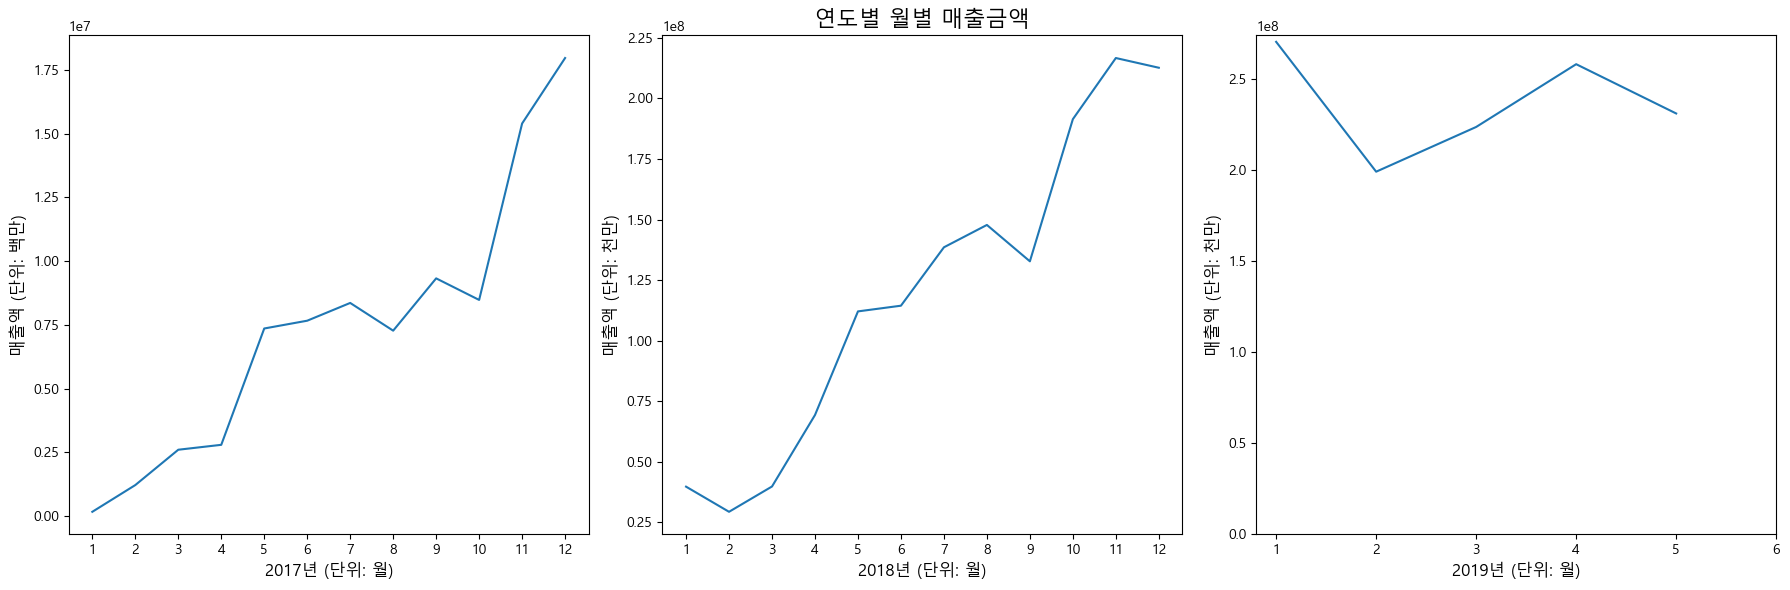

In [85]:
# 연도별 월별 매출금액 선그래프
fig = plt.figure(figsize=(18,6))

ax = fig.add_subplot(1,3,1)
ax.plot(order_time_accending_2017.groupby('배송시작일_dt_month')['판매가'].sum().index, order_time_accending_2017.groupby('배송시작일_dt_month')['판매가'].sum().values)
ax.set_xticks(range(1,13,1))
ax.set_xlabel('2017년 (단위: 월)', fontsize=12)
ax.set_ylabel('매출액 (단위: 백만)', fontsize=12)

ax = fig.add_subplot(1,3,2)
ax.plot(order_time_accending_2018.groupby('배송시작일_dt_month')['판매가'].sum().index, order_time_accending_2018.groupby('배송시작일_dt_month')['판매가'].sum().values)
ax.set_xticks(range(1,13,1))
ax.set_xlabel('2018년 (단위: 월)', fontsize=12)
ax.set_ylabel('매출액 (단위: 천만)', fontsize=12)

plt.title('연도별 월별 매출금액', size=16)

ax = fig.add_subplot(1,3,3)
ax.plot(order_time_accending_2019.groupby('배송시작일_dt_month')['판매가'].sum().index, order_time_accending_2019.groupby('배송시작일_dt_month')['판매가'].sum().values)
ax.set_xticks(range(1,7,1))
ax.set_yticks(range(0,270000000,50000000))
ax.set_xlabel('2019년 (단위: 월)', fontsize=12)
ax.set_ylabel('매출액 (단위: 천만)', fontsize=12)

plt.tight_layout()
plt.show()

### 주소 데이터 확인

In [86]:
# 짧은 배송기간 데이터 주소지 확인
early = order[['배송기간_4일미만', '수령인 주소']]
early[early['배송기간_4일미만'] == True]['수령인 주소'].str.split(' ').str[0].value_counts()

경기도        133
서울특별시       83
대구광역시       50
충청남도        46
부산광역시       45
전라북도        27
인천광역시       26
충청북도        26
경상북도        25
광주광역시       24
경상남도        23
대전광역시       22
울산광역시       21
전라남도        20
강원도         16
경기           4
서울           3
세종특별자치시      3
경남           1
제주특별자치도      1
Name: 수령인 주소, dtype: int64

### 주문자 데이터 확인

In [87]:
# 주문자별 판매금액 합계
order.groupby('주문자ID')['판매가'].sum().sort_values(ascending=False)

주문자ID
776646558@k    20301900
mission1013    17331450
leemansome     15331070
pp257          14534220
jsckorea12     14309730
                 ...   
pp773              3480
pp567              1320
pp197                 0
39706335@n            0
down9048              0
Name: 판매가, Length: 4951, dtype: int64

In [88]:
# 주문자별 판매금액 데이터 생성
order_sale_sum = order.groupby('주문자ID', as_index=False)['판매가'].sum()
order_sale_sum.columns = ['ID', '판매가']

# 열 확인
order_sale_sum.columns

Index(['ID', '판매가'], dtype='object')

In [89]:
# 회원 데이터와 주문자별 판매금액 데이터 merge
merge_id_sale = pd.merge(order_sale_sum, member, how='right')
merge_id_sale

,ID,판매가,나이,사용가능 적립금,성별,주소(동/읍/면),최종접속일,최종주문일,유입경로,유입기기,회원 가입일,사업자구분,회원구분
0,sr7577,NaN,45,0,남자,경기도 평택시 현신3길 76 (용이동),2016-12-30 오후 5:57,NaN,블로그광고,PC,2016-12-30,개인,일반
1,cgh1385,66500.0,53,0,남자,전라북도 전주시 덕진구 동부대로 879 (호성동1가),2017-01-02 오후 12:32,2017-01-01 오후 3:38,블로그광고,모바일,2017-01-01,개인,일반
2,pjkl77,51000.0,28,0,남자,전라북도 전주시 완산구 효자동3가 1676-13,2017-02-26 오후 10:52,2017-02-26 오후 10:55,이메일광고,PC,2017-01-14,사업자,사업자
3,aabb8482,NaN,44,0,여자,충청남도 아산시 용화고길 46 (용화동),2017-01-23 오후 6:25,NaN,블로그광고,PC,2017-01-17,사업자,사업자
4,bear011,1879670.0,40,21908,남자,경기도 부천시 원미구 상일로 126 (상동),2018-12-19 오후 1:26,2018-12-19 오후 1:29,SNS광고,모바일,2017-01-17,사업자,사업자
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6570,pp1730,55870.0,31,1000,남자,경기도 의정부시 동일로454번길 40 (신곡동),2019-05-31 오후 4:38,2019-05-31 오후 4:30,유튜브광고,PC,2019-05-31,개인,전화주문 고객
6571,jsuee8228,NaN,45,1000,남자,경상북도 구미시 산호대로29길 7-7 (옥계동),2019-06-21 오후 9:38,NaN,전단지광고,PC,2019-06-05,사업자,일반
6572,aaok0204,NaN,47,1000,남자,경상남도 창원시 의창구 북면 무동로267번길 10,2019-06-12 오후 7:59,NaN,인터넷검색,모바일,2019-06-12,사업자,일반
6573,aaok02044,113300.0,46,1000,남자,경상남도 창원시 의창구 북면 무동로267번길 10,2019-06-19 오전 10:59,2019-06-19 오전 11:18,인터넷검색,모바일,2019-06-19,사업자,일반


In [90]:
# 연령대 열 생성
merge_id_sale['나이묶음'] = merge_id_sale['나이'].apply(lambda x : '20_25' if x < 25 else ('25_30' if x < 30 else ('30_35' if x < 35 else ('35_40' if x < 40 else ('40_45' if x < 45 else ('45_50' if x < 50 else '50_'))))))
merge_id_sale['나이묶음']

0       45_50
1         50_
2       25_30
3       40_45
4       40_45
        ...  
6570    30_35
6571    45_50
6572    45_50
6573    45_50
6574    45_50
Name: 나이묶음, Length: 6575, dtype: object

In [91]:
# 연령대별 회원 수 확인
merge_age_count = merge_id_sale.groupby('나이묶음', as_index=False)['나이'].count().sort_values(by = '나이')
merge_age_count

,나이묶음,나이
0,20_25,177
6,50_,222
3,35_40,391
1,25_30,461
2,30_35,1183
4,40_45,1268
5,45_50,2873


### 데이터 시각화

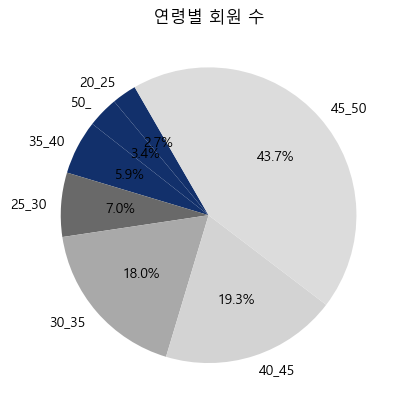

In [92]:
# 연령별 회원 수 파이 차트

# 헥스코드 리스트 생성
colors1 = ['#12306b', '#12306b', '#12306b', '#696969', '#A9A9A9', '#D3D3D3', '#DCDCDC']

plt.title('연령별 회원 수')
plt.pie(merge_age_count['나이'], labels=merge_age_count['나이묶음'], autopct='%.1f%%', startangle=120, colors=colors1)

plt.show()

In [93]:
# 결측치 제거
merge_drop = merge_id_sale.drop(merge_id_sale[merge_id_sale['판매가'].isnull() == True].index)
merge_drop

,ID,판매가,나이,사용가능 적립금,성별,주소(동/읍/면),최종접속일,최종주문일,유입경로,유입기기,회원 가입일,사업자구분,회원구분,나이묶음
1,cgh1385,66500.0,53,0,남자,전라북도 전주시 덕진구 동부대로 879 (호성동1가),2017-01-02 오후 12:32,2017-01-01 오후 3:38,블로그광고,모바일,2017-01-01,개인,일반,50_
2,pjkl77,51000.0,28,0,남자,전라북도 전주시 완산구 효자동3가 1676-13,2017-02-26 오후 10:52,2017-02-26 오후 10:55,이메일광고,PC,2017-01-14,사업자,사업자,25_30
4,bear011,1879670.0,40,21908,남자,경기도 부천시 원미구 상일로 126 (상동),2018-12-19 오후 1:26,2018-12-19 오후 1:29,SNS광고,모바일,2017-01-17,사업자,사업자,40_45
5,kim0750,73700.0,44,0,남자,경상북도 구미시 송동로7길 31-3 (도량동),2017-01-18 오후 4:28,2017-01-18 오후 4:41,SNS광고,PC,2017-01-18,사업자,사업자,40_45
6,nonane9979,226900.0,45,0,남자,부산광역시 금정구 중앙대로 1607 (부곡동),2017-02-13 오후 2:54,2017-02-13 오후 3:12,블로그광고,PC,2017-01-18,사업자,사업자,45_50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6567,1094652352@k,77000.0,47,700,남자,NaN,2019-05-31 오전 10:05,2019-05-31 오전 10:07,블로그광고,PC,2019-05-31,개인,일반,45_50
6568,1094746791@k,300000.0,47,1200,남자,NaN,2019-05-31 오후 5:00,2019-05-31 오후 4:58,SNS광고,모바일,2019-05-31,개인,일반,45_50
6569,51775030@n,61900.0,45,600,남자,NaN,2019-05-31 오후 2:41,2019-05-31 오후 3:17,SNS광고,모바일,2019-05-31,개인,일반,45_50
6570,pp1730,55870.0,31,1000,남자,경기도 의정부시 동일로454번길 40 (신곡동),2019-05-31 오후 4:38,2019-05-31 오후 4:30,유튜브광고,PC,2019-05-31,개인,전화주문 고객,30_35


In [94]:
# 연령대 열 생성
merge_drop['나이묶음'] = merge_drop['나이'].apply(lambda x : '20_25' if x < 25 else ('25_30' if x < 30 else ('30_35' if x < 35 else ('35_40' if x < 40 else ('40_45' if x < 45 else ('45_50' if x < 50 else '50_'))))))
merge_drop['나이묶음']

1         50_
2       25_30
4       40_45
5       40_45
6       45_50
        ...  
6567    45_50
6568    45_50
6569    45_50
6570    30_35
6573    45_50
Name: 나이묶음, Length: 4939, dtype: object

In [95]:
# 연령대별 판매금액 합계 확인
merge_age_sale = merge_drop.groupby('나이묶음', as_index=False)['판매가'].sum().sort_values(by = '판매가')
merge_age_sale

,나이묶음,판매가
0,20_25,1.651220e+08
6,50_,1.737140e+08
3,35_40,2.194957e+08
1,25_30,2.674990e+08
5,45_50,2.917055e+08
2,30_35,3.231419e+08
4,40_45,1.058618e+09


### 데이터 시각화

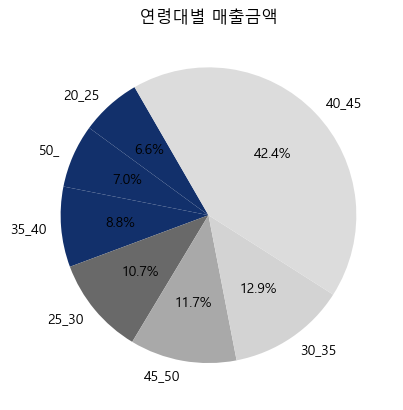

In [96]:
# 연령대별 매출금액 비율 파이 차트

colors2 = ['#12306b', '#12306b', '#12306b', '#696969', '#A9A9A9', '#D3D3D3', '#DCDCDC']

plt.title('연령대별 매출금액')
plt.pie(merge_age_sale['판매가'], labels=merge_age_sale['나이묶음'], autopct='%.1f%%', startangle=120, colors=colors2)

plt.show()

In [97]:
# 성별에 따른 판매금액 합계 확인
merge_age_sale2 = merge_drop.groupby('성별')['판매가'].sum()
merge_age_sale2

성별
남자    1.951200e+09
여자    5.480962e+08
Name: 판매가, dtype: float64

### 데이터 시각화

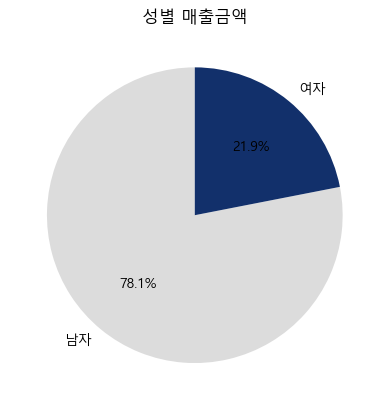

In [98]:
# 성별 매출금액 비율 파이 차트
colors3 = ['#DCDCDC', '#12306b']

plt.title('성별 매출금액')
plt.pie(merge_age_sale2, labels=['남자', '여자'], autopct='%.1f%%', startangle=90, colors=colors3)

plt.show()